In [1]:
import pandas as pd
import requests
import configparser
import json
import matplotlib.pyplot as plt

## Load the API keys

In [7]:
## Read the API
parser = configparser.ConfigParser()
parser.read(r"C:\Users\kbora\Desktop\Development\Data Engineering\01-Airflow-Example\config.cfg")
api_key = parser["KEYS"]["api_key"]

'4e0dc0906654ed742193cb2f2770309c'

## Functions

In [22]:
## Get the temperature data from location

lat = 19.076
lon = 72.8777

URL = f"https://api.openweathermap.org/data/2.5/weather"
CITIES = pd.read_csv(
    r"C:\Users\kbora\Desktop\Development\Data Engineering\01-Airflow-Example\data\top_20_cities_india.csv"
)
COLUMNS = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'grnd_level']


def get_weather_data(lat, lon):
    params = {"lat": lat, "lon": lon, "appid": api_key, "units": "metric"}
    response = requests.get(URL, params=params)

    data = None
    if response.status_code == 200:
        json_object = json.loads(response.text)
        data = json_object["main"]
        data = list(data.values())

    else:
        print("Connection Error")

    return data

def get_weather_dataframe(export_path):
    try:
        weather_df = CITIES.copy()
        weather_df['weather_data'] = weather_df.apply(lambda x: get_weather_data(x['Latitude'], x['Longitude']), axis=1)
        weather_df[COLUMNS] = weather_df['weather_data'].to_list()
        weather_df.drop('weather_data', axis=1, inplace=True)

        weather_df.to_csv(export_path)
        print(f"The data was successfully exported as {export_path}")
        return True
    
    except Exception as e:
        print("Error:", e)
        return False

## Get the latest weather data

In [23]:
## Write it to the database or save it as a flat file
export_path = r"C:\Users\kbora\Desktop\Development\Data Engineering\01-Airflow-Example\data\weather.csv"
df_weather = get_weather_dataframe(export_path)

The data was successfully exported as C:\Users\kbora\Desktop\Development\Data Engineering\01-Airflow-Example\data\weather.csv


## Plot the weather data

In [14]:
def plot_city_temperatures(df):
    """
    Plots the temperature of cities from the given DataFrame.

    df (DataFrame): DataFrame containing city names and their corresponding temperatures.
    """
    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis

    # Create a bar graph
    bars = ax.bar(df['City'], df['temp'], color='skyblue')

    # Add titles and labels
    ax.set_title('Temperature of Cities in India', fontsize=16)
    ax.set_xlabel('City', fontsize=14)
    ax.set_ylabel('Temperature (°C)', fontsize=14)

    # Rotate x-titles for better visibility
    ax.set_xticks(range(len(df['City'])))  # Set x-ticks to match the number of cities
    ax.set_xticklabels(df['City'], rotation=45, ha='right')

    # Add grid for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
                ha='center', va='bottom', fontsize=10)  # Add text above the bar

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Show the plot
    plt.show()

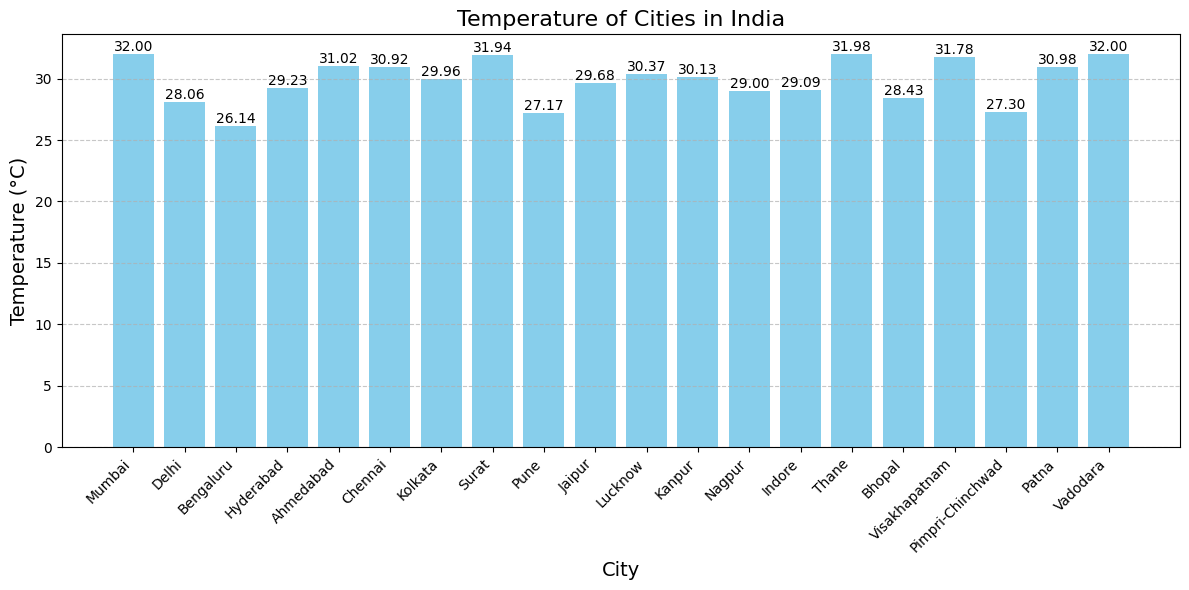

In [15]:
plot_city_temperatures(df_weather)

## Check the total size of the `conda env`

In [17]:
import os

def get_env_size(env_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(env_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Replace with the actual path to your conda environment
env_path = r'C:\Users\kbora\Anaconda3\envs\airflow-pipeline'
size_in_bytes = get_env_size(env_path)
size_in_mb = size_in_bytes / (1024 * 1024)  # Convert to MB

print(f"Size of the conda environment 'airflow-pipeline': {size_in_mb:.2f} MB")

Size of the conda environment 'airflow-pipeline': 666.77 MB
